In [1]:
import numpy as np
import matplotlib.pyplot as plt

초기 void fraction 10%를 가지는 130 $\mu$ m의 ply 16개로 만든 laminate를 $110^{\circ}$ C 에서 30분-1시간 wetting 했을 때, void가 얼마나 남아 있을지 구현한다.

In [2]:
L = 500 # [mm]
H = 0.13*16 #[mm]
Vf = 0.55
R = 8.3145 # [J/ mol K]

In [3]:
A = 153000 # [1/s]
dE = 66500 # [J/mol]
m = 0.813
n = 2.74
C = 43.1
a_C0 = -1.684
a_CT = 5.475/1000 # [1/K]
def dadt(alpha, T):
    Ka = A*np.exp(-dE/(R*T))
    num = Ka*alpha**m * (1-alpha)**n
    den = 1+ np.exp(alpha-a_C0-a_CT*T)
    return num/den

In [5]:
gas_mu0 = 1.81/10**5 # [Pa s]
def gas_viscosity(T):
    # Sutherland's Formula
    gas_mu = gas_mu0*((293+117)/(T+117))*(T/293)**0.5
    return gas_mu

In [19]:
voids0 = 0.1*H*(2*np.arange(1,L//2)-1)

In [38]:
void_frac = 0.1
void_total = void_frac*L*L*H # [mm^3]
Pv = 10 # [kPa]
alpha = 0.01
K0 = 1/10**12 # [mm^2]
K = 10*K0
n = 100
Pcs = np.linspace(300, 600, n)
ramp = [0]*n
results = [0]*n
voids0 = np.append(void_frac*H*(2*np.arange(1,L//2)-1),[0])
Ts0 = np.concatenate((np.linspace(20+273, 110+273, 18*60), (110+273)*np.ones(3600)), axis=None)
for k in range(n):
    Pc = Pcs[k]
    temp = 20+273 # [K]
    voids = voids0
    Ps = np.sqrt(2*np.arange(L//2-1)*(Pv*Pv-Pc*Pc)/L + Pc*Pc)
    Ts = Ts0
    i = 1
    for t in Ts:
        mu = gas_viscosity(temp)
        Q = (2*np.arange(L//2-1)+1)*H*K/(mu*L)*(Pc*Pc-Pv*Pv)/Ps
        voids = voids - (np.concatenate((Q,[0]))) + np.concatenate(([0],Q))
        alpha += dadt(alpha, temp)
        temp += 5/60
        i += 1
        if i == 18*60:
            ramp[k] = voids[-1]
    results[k] = 4*voids[-1]
    

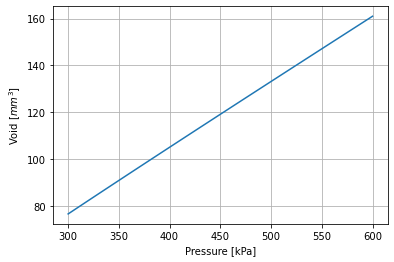

In [42]:
plt.plot(Pcs, results)
plt.xlabel("Pressure [kPa]")
plt.ylabel("Void [$mm^3$]")
plt.grid()

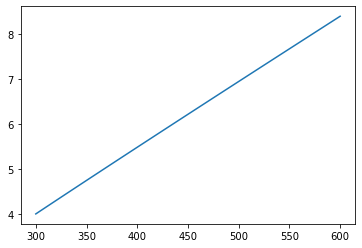

In [40]:
plt.plot(Pcs, ramp)

In [41]:
print(void_total, 4*voids[-1], 4*voids[-1]/void_total)

52000.0 160.98802724567838 0.0030959236008784303
